<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


The chance of the knight crossing the bridge safely is 60%.

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

I do not agree with the knight because within the three given scenarios, only two of them contain trolls, event 1 and 2. Together, there are three trolls that can be captured and only by capturing the troll from the second event will allow him to cross the bridge safely. However, if he captures a troll from event 1, then there will still be a troll remaining.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

After a troll was captured, the knight needs to consider both events 1 and 2.

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 


Likelihood: P(T|E1) = 2/5 = 0.4; Prior: P(E1) = 0.2; 

Marginal Probability: P(T) = probability of a troll captured = P(T|E1) + P(T|E2) + P(T|E3) = (2/5) *0.2 + (1/5) *0.2 + (0) *0.6 = 0.12 


Posterior: P(E1|T) = P(T|E1)P(E1)/P(T) = (0.4*0.2)/0.12 = 2/3 = 0.667

Probability of the other event given a troll captured: 

Likelihood: P(T|E2) = 1/5 = 0.2; Prior: P(E2) = 0.2; 

Marginal Probability: P(T) = probability of a troll captured = P(T|E1) + P(T|E2) + P(T|E3) = (2/5) *0.2 + (1/5) *0.2 + (0) *0.6 = 0.12 

Posterior: P(E2|T) = P(T|E2)P(E2)/P(T) = (0.2*0.2)/0.12 = 1/3 = 0.333

### 1.5

#### What is the chance of the knight crossing safely?

The chance of the knight crossing safely is 1/3 = 0.333.

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [1]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

    Updating registry at `C:\Users\micke\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\micke\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\micke\.julia\environments\v1.8\Manifest.toml`


In [2]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [3]:
x = -10:10

-10:10

In [4]:
y_true = x.^2 .+3x .-2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [6]:
dataerr = 10.0
d = di.Normal(0,dataerr)
y_observed = y_true .+ rand(d,length(x))

21-element Vector{Float64}:
  58.47899901715221
  45.720760285103125
  28.52482458736744
  15.870482985108673
  18.376160272395765
   7.309216144205561
  -7.283432780349601
   6.937369665845026
   0.9061054019127655
  -3.420536405198407
  13.76200333994233
  -1.733633456158738
 -14.218929269663995
  21.58727911339174
  24.374612998448907
  28.87998533625354
  51.75142155948247
  81.15321446674619
  89.21164584382463
  91.76735807499728
 134.94355756664123

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

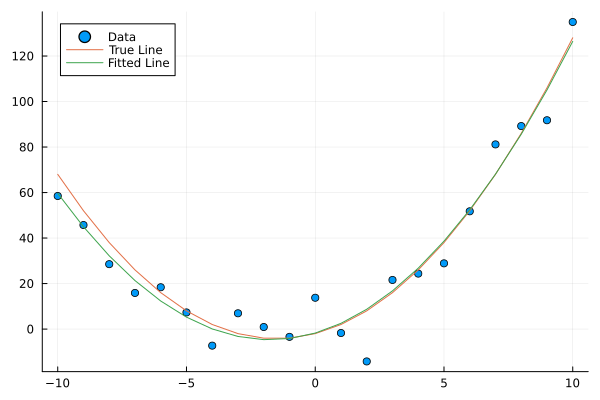

In [15]:
using Plots
scatter(x,y_observed, label = "Data")
plot!(x,y_true, label = "True Line")
using Polynomials: Polynomial, fit, coeffs
line_fit = fit(x,y_observed,2)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1].+ fit_coeff[2].*x .+ fit_coeff[3].* x.^2
plot!(x,y_fitted, label = "Fitted Line")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

In [16]:
dataerr_50 = 50.0
d_50 = di.Normal(0,dataerr_50)
y_observed50 = y_true .+ rand(d_50,length(x))

21-element Vector{Float64}:
  107.54702435724914
    4.5819565388322445
    5.599868192101965
  -41.793271392624845
   14.034454891598156
  -68.29203679429132
   47.74165501507609
   44.822909487237844
    7.047812612605638
   -3.6767250750128997
  -46.540239158558826
   34.01771557915076
  -33.760138790125474
  -20.127962462756436
   34.9643968425702
 -135.4060373942049
   80.40239156195707
   81.21231670600926
  120.53820361955346
  153.9397159075165
   78.21887458903495

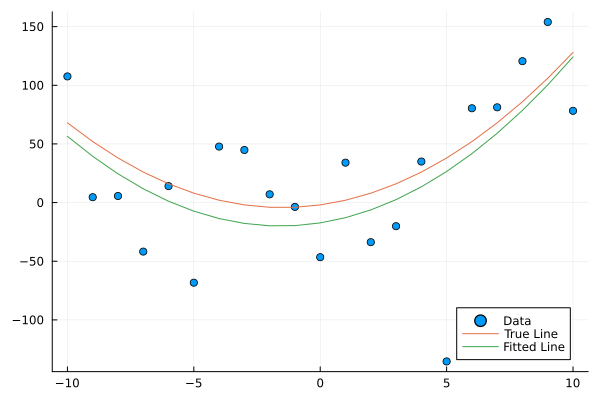

In [17]:
using Plots
scatter(x,y_observed50, label = "Data")
plot!(x,y_true, label = "True Line")
using Polynomials: Polynomial, fit, coeffs
line_fit = fit(x,y_observed50,2)
fit_coeff = coeffs(line_fit)
y_fitted = fit_coeff[1].+ fit_coeff[2].*x .+ fit_coeff[3].* x.^2
plot!(x,y_fitted, label = "Fitted Line")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The fit is further from y_true in the plot in 2.4 compared to the plot in 2.3 because the standard deviation of the Gaussian noise is larger.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


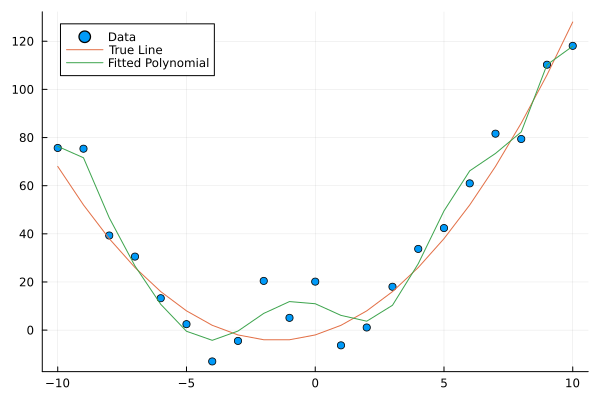

In [42]:
x = -10:10
y_true = (x.^2) .+ (3 .* x) .-2
dataerr = 10.0
d = di.Normal(0,dataerr)
y_observed = y_true .+ rand(d,length(x))

scatter(x,y_observed, label = "Data")
plot!(x,y_true, label = "True Line")
poly_fit = Polynomials.fit(x,y_observed,10)
y_polyfitted = poly_fit.(x)
plot!(x,y_polyfitted, label = "Fitted Polynomial")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


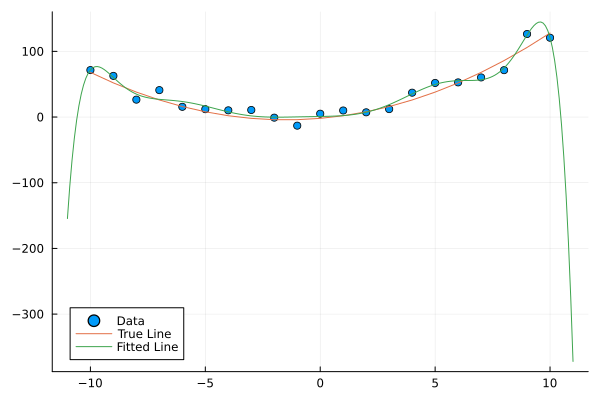

In [45]:
y_true = (x.^2) .+ (3 .* x) .-2
dataerr = 10.0
d = di.Normal(0,dataerr)
y_observed = y_true .+ rand(d,length(x))
x_fit = -11:0.1:11
scatter(x,y_observed, label = "Data")
plot!(x,y_true, label = "True Line")
poly_fit11 = Polynomials.fit(x,y_observed,10)
y_polyfitted11 = poly_fit11.(x_fit)
plot!(x_fit,y_polyfitted11, label = "Fitted Line")

3. What do you observe in the plot? What is this phenomenon called?

A phenomenon called overfitting is observed in the plot in which the fitted line is trying to accomodate every given parameter. However, it can only accurate predict previously given data and not new data.